# 有向图可视化模板

NetworkX可视化有向图的代码模板。

同济子豪兄 2022-7-7

参考文档：https://networkx.org/documentation/stable/auto_examples/drawing/plot_directed.html#sphx-glr-auto-examples-drawing-plot-directed-py

## 导入工具包

In [1]:
# 图数据挖掘
import networkx as nx

import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
import matplotlib as mpl

## 创建有向图

In [3]:
seed = 13648
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

## 初步可视化

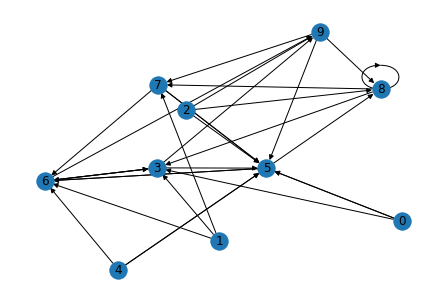

In [4]:
nx.draw(G, pos, with_labels=True)

## 高级可视化设置

In [21]:
# 节点大小
node_sizes = [12 + 10 * i for i in range(len(G))]

In [22]:
node_sizes

[12, 22, 32, 42, 52, 62, 72, 82, 92, 102]

In [23]:
# 节点颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)

In [24]:
edge_colors

range(2, 32)

In [25]:
# 节点透明度
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

In [26]:
edge_alphas

[0.14705882352941177,
 0.17647058823529413,
 0.20588235294117646,
 0.23529411764705882,
 0.2647058823529412,
 0.29411764705882354,
 0.3235294117647059,
 0.35294117647058826,
 0.38235294117647056,
 0.4117647058823529,
 0.4411764705882353,
 0.47058823529411764,
 0.5,
 0.5294117647058824,
 0.5588235294117647,
 0.5882352941176471,
 0.6176470588235294,
 0.6470588235294118,
 0.6764705882352942,
 0.7058823529411765,
 0.7352941176470589,
 0.7647058823529411,
 0.7941176470588235,
 0.8235294117647058,
 0.8529411764705882,
 0.8823529411764706,
 0.9117647058823529,
 0.9411764705882353,
 0.9705882352941176,
 1.0]

In [27]:
# 配色方案
cmap = plt.cm.plasma
# cmap = plt.cm.Blues

/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


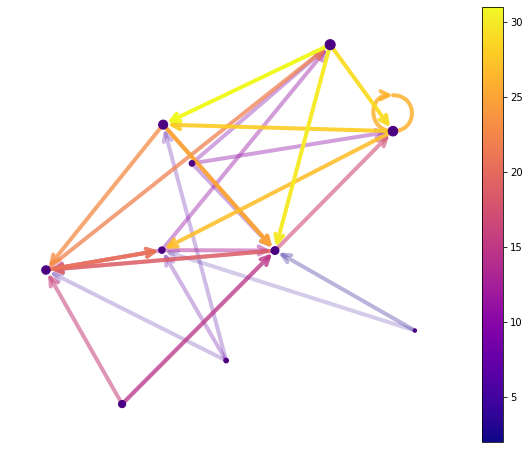

In [28]:
plt.figure(figsize=(10,8))

# 绘制节点
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")

# 绘制连接
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,   # 节点尺寸
    arrowstyle="->",        # 箭头样式
    arrowsize=20,           # 箭头尺寸
    edge_color=edge_colors, # 连接颜色
    edge_cmap=cmap,         # 连接配色方案
    width=4                # 连接线宽
)


# 设置每个连接的透明度
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

# 调色图例
pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()